In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of Ai/Bank Customer Churn Prediction (1).csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print("Dataset Overview:\n")
df.info()

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
print("\nSummary Statistics:\n")
df.describe()



Summary Statistics:



,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


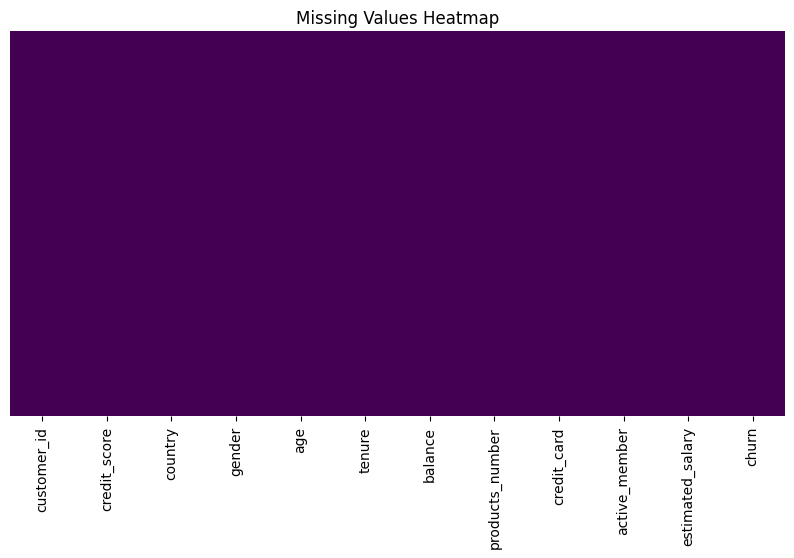

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-8-5a4e0184ba5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='credit_card', data=df, palette="coolwarm")


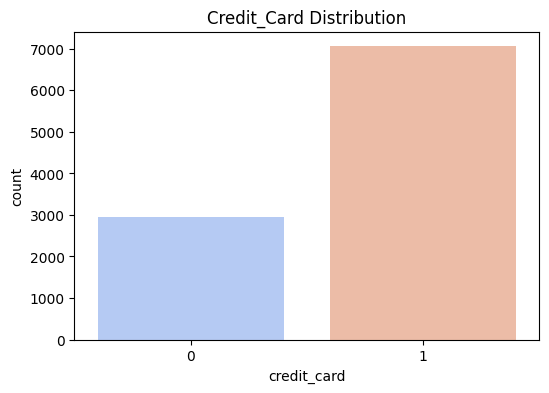

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_card', data=df, palette="coolwarm")
plt.title("Credit_Card Distribution")
plt.show()

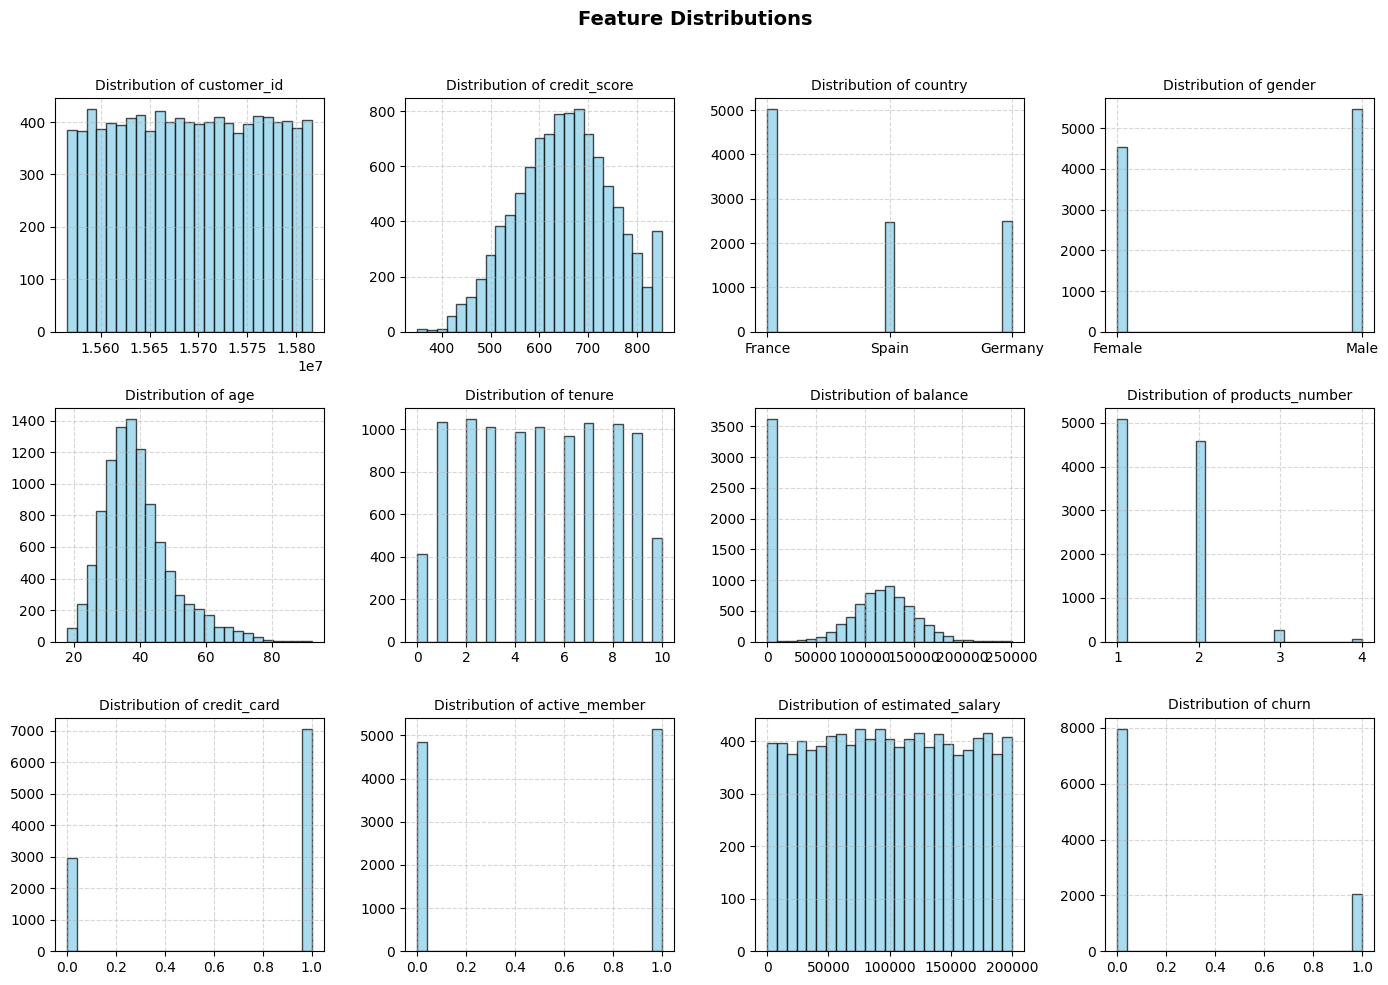

In [ ]:
import matplotlib.pyplot as plt

# Define number of columns for subplot layout
num_features = df.shape[1]
cols = 4  # Number of columns in subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Compute rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each feature
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {col}", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
fig.suptitle("Feature Distributions", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values
df = df.copy()  # Ensure original DataFrame isn't modified
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.drop(columns=['customer_id'], inplace=True)

In [ ]:
categorical_columns = [
    'country', 'gender'
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
X = df.drop(columns=['credit_card'])
y = df['credit_card']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardization (Fit only on X_train, then transform both)
numerical_columns = [
     'credit_score', 'age', 'tenure', 'balance', 'products_number', 'active_member', 'estimated_salary'
]

In [ ]:
scaler = StandardScaler()
# Ensure X_train is still a DataFrame
print(X_train.columns)

#  Ensure X_train & X_test are DataFrames before standardizing
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Step 6: Convert to NumPy Arrays (After Preprocessing)
X_train = X_train.to_numpy(dtype=np.float64)
X_test = X_test.to_numpy(dtype=np.float64)
y_train = y_train.to_numpy(dtype=np.float64)
y_test = y_test.to_numpy(dtype=np.float64)


# Step 7: Confirm Shapes & Data Types
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("X_test shape:", X_test.shape, "dtype:", X_test.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("y_test shape:", y_test.shape, "dtype:", y_test.dtype)

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'active_member', 'estimated_salary', 'churn', 'country_Germany',
       'country_Spain', 'gender_Male'],
      dtype='object')
X_train shape: (8000, 11) dtype: float64
X_test shape: (2000, 11) dtype: float64
y_train shape: (8000,) dtype: float64
y_test shape: (2000,) dtype: float64


In [ ]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1/(1 + np.exp(-x))
  return y

In [ ]:
import numpy as np

def log_loss(y_true, y_pred):
    y_pred = np.asarray(y_pred)  # Ensure it's a NumPy array
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip values
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return loss


In [ ]:
def cost_function(y_true, y_pred):
    y_pred = np.asarray(y_pred)  # Convert to NumPy array if needed
    assert len(y_true) == len(y_pred), "Mismatch in `y_true` and `y_pred` lengths"

    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])  # Apply element-wise loss
    cost = np.dot(loss_vec, np.ones(n)) / n  # Mean loss
    return cost


In [ ]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)
    return cost


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b =  np.dot(np.ones(n), (y_pred - y)) / n

    return grad_w, grad_b

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients

        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -=alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Gradient Magnitude = {np.linalg.norm(grad_w):.6f}")
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [ ]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob =logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [ ]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP =np.sum((y_true == 0) & (y_pred == 1))# False Positives
    FN =np.sum((y_true == 1) & (y_pred == 0)) # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [ ]:
#  Correct: Random small values for weights
np.random.seed(42)  # For reproducibility
w = np.random.randn(X_train.shape[1])   # Small random values
b = 0.0
alpha = 0.01
n_iter = 2000

In [ ]:
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)



Training Logistic Regression Model:
Iteration 0: Gradient Magnitude = 0.377132
Iteration 0: Cost = 1.246502
Iteration 100: Gradient Magnitude = 0.346845
Iteration 100: Cost = 1.077934
Iteration 200: Gradient Magnitude = 0.311055
Iteration 200: Cost = 0.945581
Iteration 300: Gradient Magnitude = 0.271710
Iteration 300: Cost = 0.846546
Iteration 400: Gradient Magnitude = 0.231858
Iteration 400: Cost = 0.775721
Iteration 500: Gradient Magnitude = 0.194540
Iteration 500: Cost = 0.726782
Iteration 600: Gradient Magnitude = 0.161735
Iteration 600: Cost = 0.693596
Iteration 700: Gradient Magnitude = 0.134105
Iteration 700: Cost = 0.671186
Iteration 800: Gradient Magnitude = 0.111414
Iteration 800: Cost = 0.655960
Iteration 900: Gradient Magnitude = 0.093045
Iteration 900: Cost = 0.645485
Iteration 1000: Gradient Magnitude = 0.078304
Iteration 1000: Cost = 0.638160
Iteration 1100: Gradient Magnitude = 0.066552
Iteration 1100: Cost = 0.632936
Iteration 1200: Gradient Magnitude = 0.057237
Itera

In [ ]:

# Test model
y_train_pred = prediction(X_train, w, b)
y_test_pred = prediction(X_test, w, b)



In [ ]:
 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train, y_train, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.6170
Test Loss (Cost): 0.6120


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
# pd.crosstab(y_test,y_pred)


Test Accuracy: 71.35%

Confusion Matrix:
[[   0  573]
 [   0 1427]]
Precision: 0.71
Recall: 1.00
F1-Score: 0.83


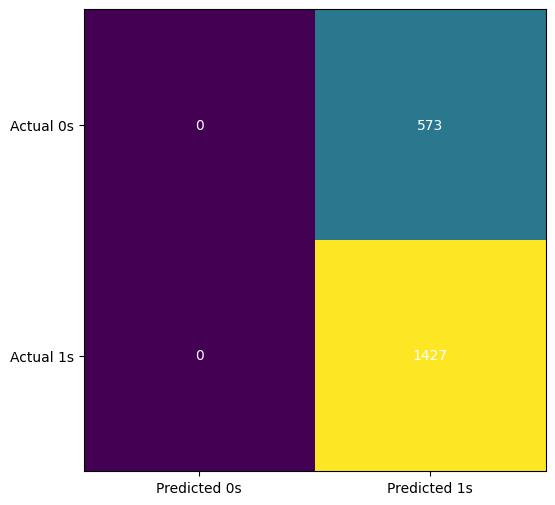

In [ ]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

## Logistic using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter if convergence is an issue

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 71.35%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       573
         1.0       0.71      1.00      0.83      1427

    accuracy                           0.71      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.51      0.71      0.59      2000

Confusion Matrix for Logistic Regression:
 [[   0  573]
 [   0 1427]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#gives more accuracy while using sklearn

## KNN

In [ ]:
# Initialize the KNN model with k=5 (you can adjust k if needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 64.85%
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.30      0.17      0.22       573
         1.0       0.72      0.84      0.77      1427

    accuracy                           0.65      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.60      0.65      0.61      2000

Confusion Matrix for KNN:
 [[  98  475]
 [ 228 1199]]


## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],  # Reduced from 100 to improve convergence
    'max_iter': [500, 1000],  # Increased max_iter
    'solver': ['lbfgs', 'saga']  # lbfgs is more stable
}

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan']
}
# Logistic Regression Grid Search
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train, y_train)

# KNN Grid Search
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found for both models
print("Best hyperparameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best hyperparameters for KNN:", knn_grid_search.best_params_)


Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top 10 features using mutual information
selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

# Rebuild models using selected features
logreg.fit(X_train_selected, y_train)
knn.fit(X_train_selected, y_train)

# Evaluate models on the test set with selected features
logreg_accuracy = logreg.score(X_test_selected, y_test)
knn_accuracy = knn.score(X_test_selected, y_test)

print(f"Logistic Regression Accuracy with selected features: {logreg_accuracy}")
print(f"KNN Accuracy with selected features: {knn_accuracy}")


Selected feature indices: [ 0  1  2  3  4  5  7  8  9 10]
Logistic Regression Accuracy with selected features: 0.7135
KNN Accuracy with selected features: 0.6415


 # Final model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Apply feature selection to training and test sets
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train Logistic Regression with best hyperparameters
final_logreg = LogisticRegression(C=0.1, max_iter=500, solver='saga')
final_logreg.fit(X_train_selected, y_train)

# Train KNN with best hyperparameters
final_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='uniform')
final_knn.fit(X_train_selected, y_train)

# Predictions
logreg_preds = final_logreg.predict(X_test_selected)
knn_preds = final_knn.predict(X_test_selected)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_preds) * 100  # Convert to percentage
knn_accuracy = accuracy_score(y_test, knn_preds) * 100  # Convert to percentage

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}%")
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_preds))

print("\nKNN Accuracy: {:.2f}%".format(knn_accuracy))
print("KNN Report:")
print(classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))


Logistic Regression Accuracy: 71.35%
Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       573
         1.0       0.71      1.00      0.83      1427

    accuracy                           0.71      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.51      0.71      0.59      2000

Confusion Matrix:
 [[   0  573]
 [   0 1427]]

KNN Accuracy: 64.90%
KNN Report:
              precision    recall  f1-score   support

         0.0       0.29      0.15      0.20       573
         1.0       0.71      0.85      0.78      1427

    accuracy                           0.65      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.59      0.65      0.61      2000

Confusion Matrix:
 [[  86  487]
 [ 215 1212]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
